In [ ]:
## Predicting heart disease using machine learning step
we are going to take following step:
1. Problems definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

### problem defintion
> Given clinical parameters about a patient, can we predict whether or not the have heart_disease or not
### Data
the original data come from the UCI Machine Learning Respository
### 3. Evaluation 
> If we can reach 95 % accuracy predicting were ornot a patient has heart disease during the proof of concept, we'll pursue the project
### Features
This is where you' ll get different  information about each of the features in your data

## Preparing the tools
we are going to use pandas, Matplotlib and Numpy  for Data analysisa and manipulation

In [117]:
# Import all the tools we need
# regular EDA( exploratry data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
# we want our plot to appear inside the plot
%matplotlib inline
#bModel from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics  import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


##  load data

In [7]:
h_df = pd.read_csv("heart-disease.csv")
h_df.shape

(303, 14)

## Data Exploration
The goal here is to find out more about the data and become a subject matter export on the dataset you are working with
1. what question are you trying to solve
2. What kind of data do we have and how do we treat different types?
3.  what is missing from the data and how do deal with it?
4.  Where are the outliers and why should you care about them
5.  How can you add change or remove to get mor out of your data?

In [8]:
h_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# let's find out how many of each class there
h_df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [12]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
h_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to sex

In [16]:
h_df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [17]:
# Compare our data 
pd.crosstab(h_df.target, h_df.sex)

sex,0,1
target,,
0,24,114
1,72,93


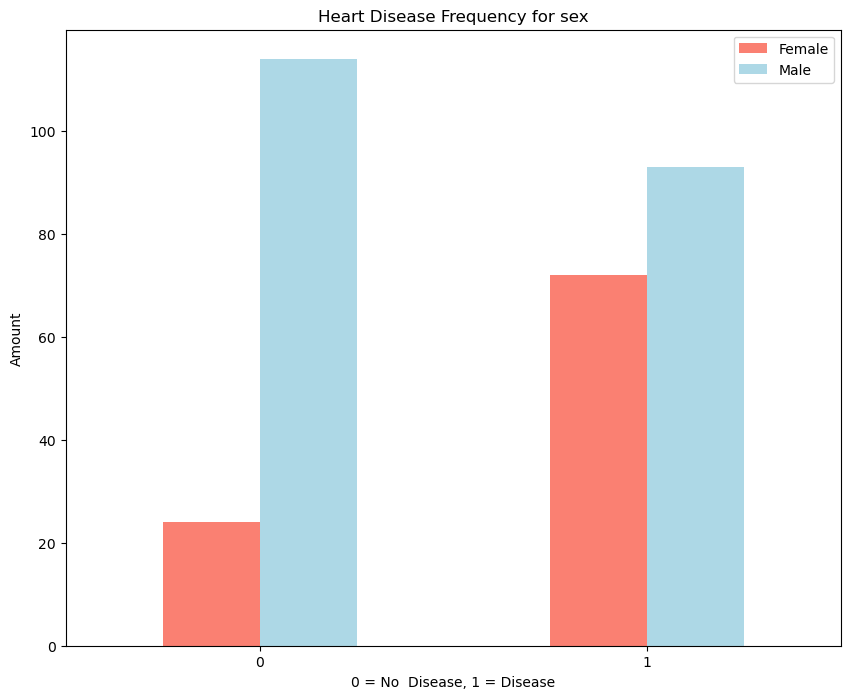

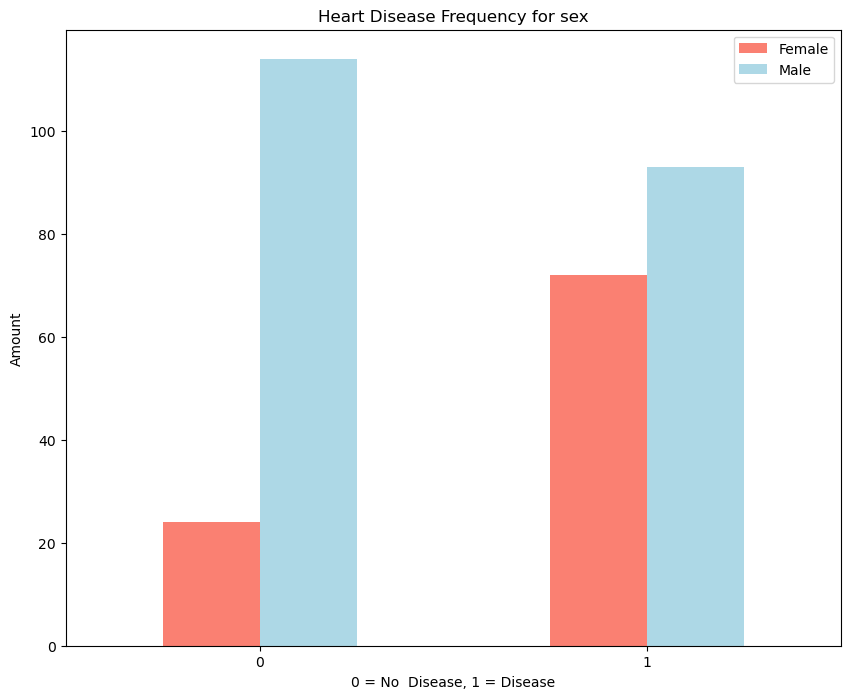

In [20]:
# create a visualisation of crosstab
pd.crosstab(h_df.target, h_df.sex).plot(kind="bar", 
                                        figsize =(10, 8),
                                        color =["salmon", "lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No  Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);
plt.show()

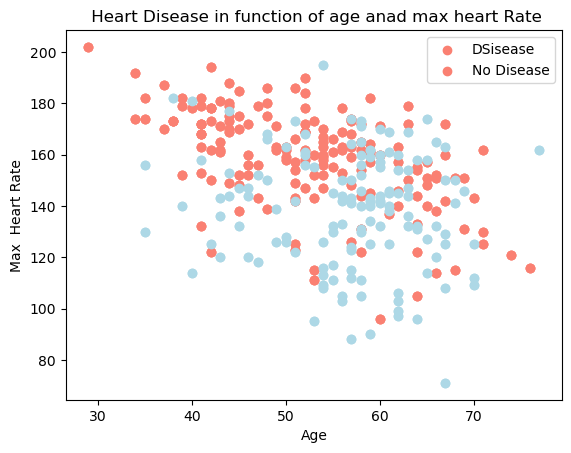

In [27]:
## Another plot
plt.scatter(h_df.age[h_df.target==1],
            h_df.thalach[h_df.target==1],
            c="salmon")
# scatter wityh negative exemple
plt.scatter(h_df.age[h_df.target==0],
           h_df.thalach[h_df.target==0],
            c="lightblue")
plt.title(" Heart Disease in function of age anad max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max  Heart Rate")
plt.legend(["DSisease", "No Disease"]);
plt.show()

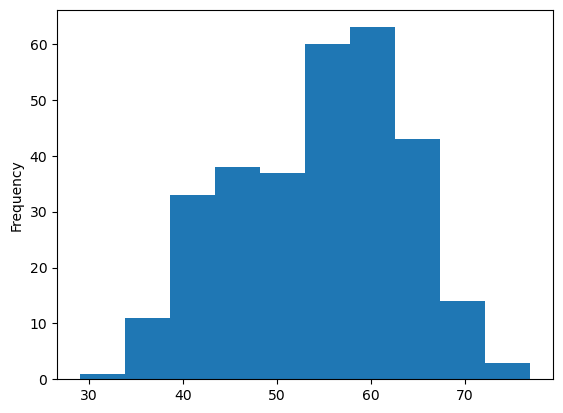

In [28]:
h_df.age.plot.hist();
plt.show()

In [29]:
# Make correlation matrix
h_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


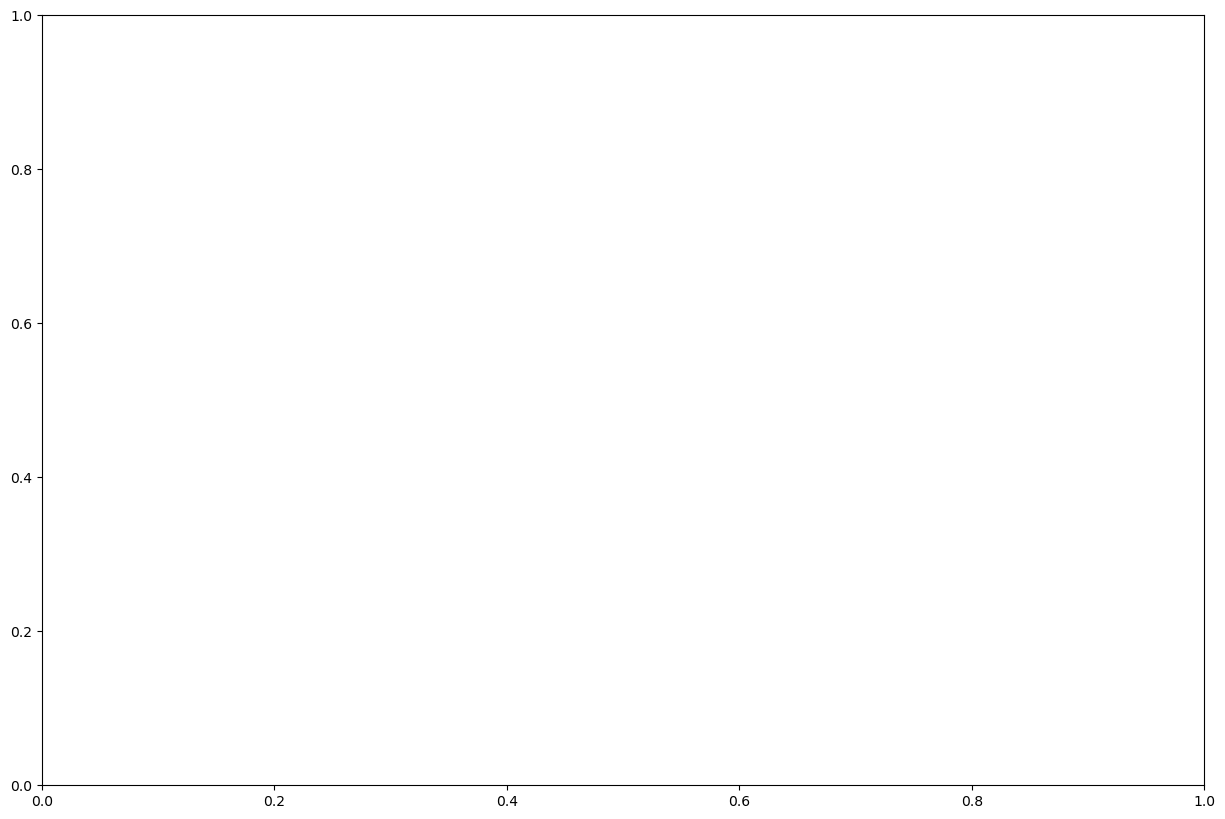

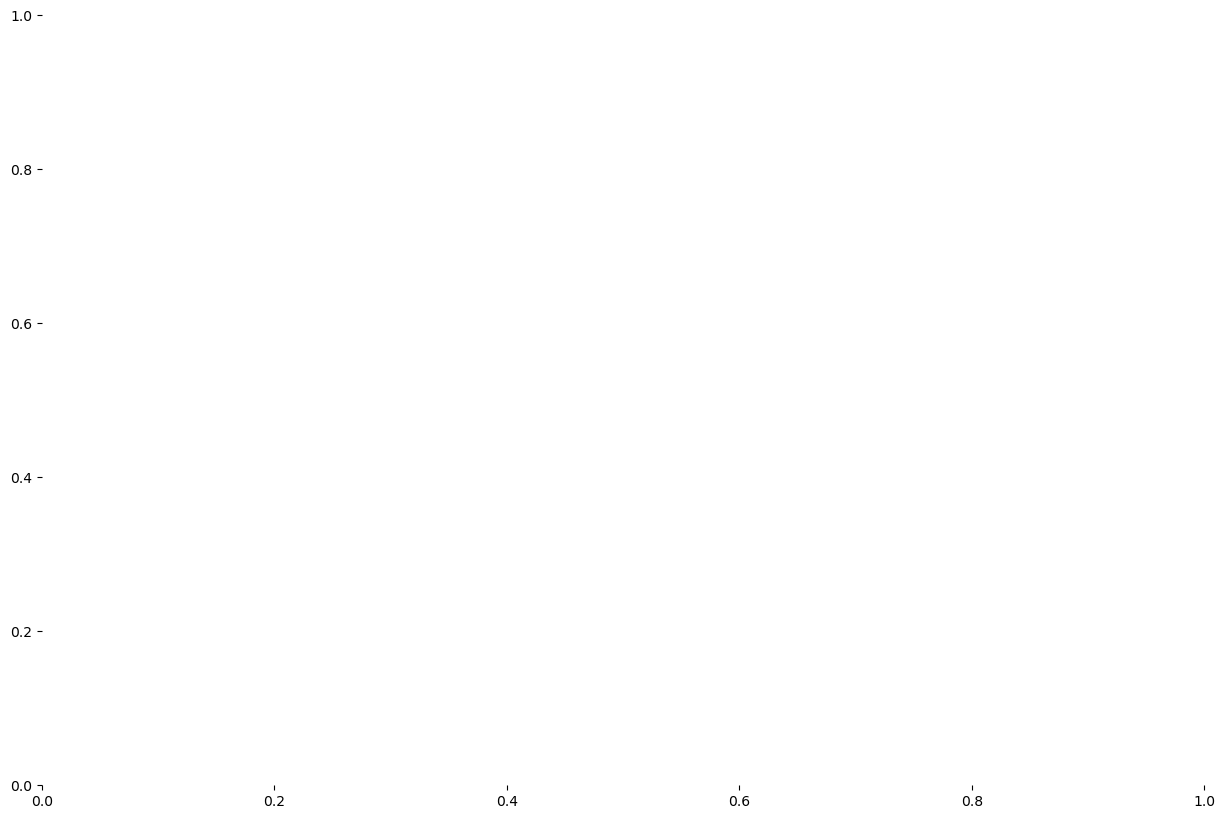

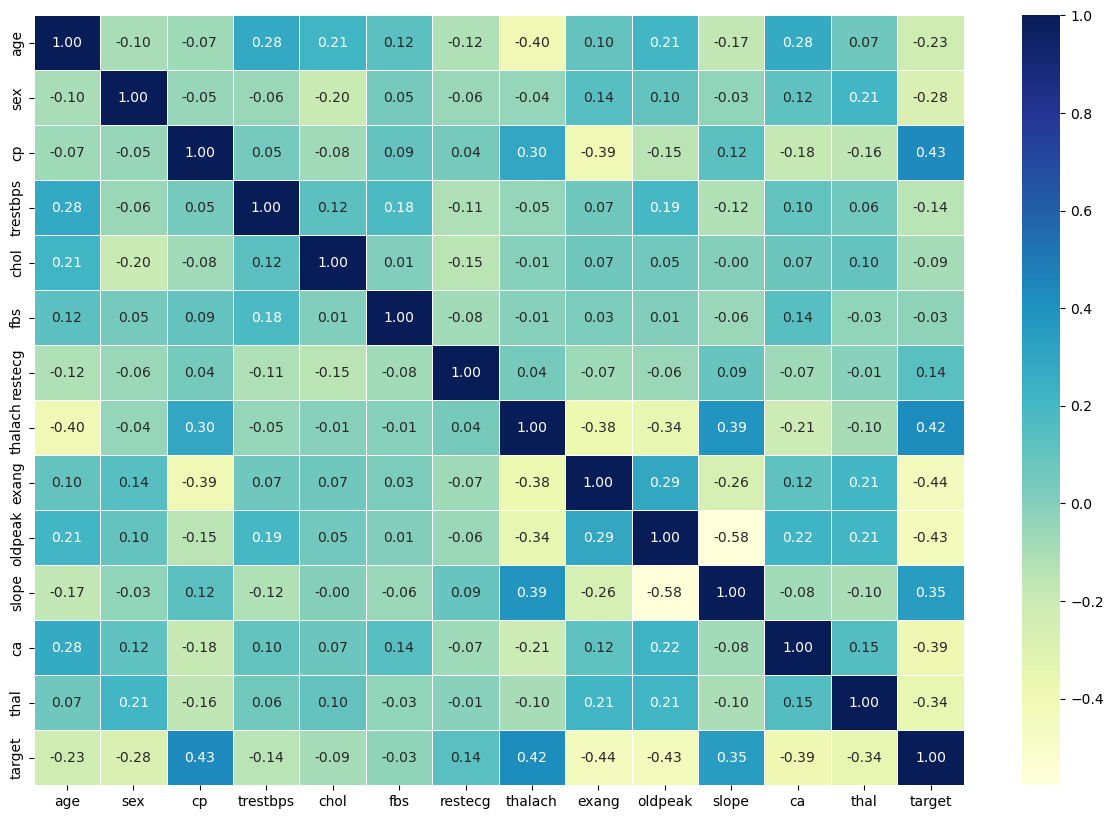

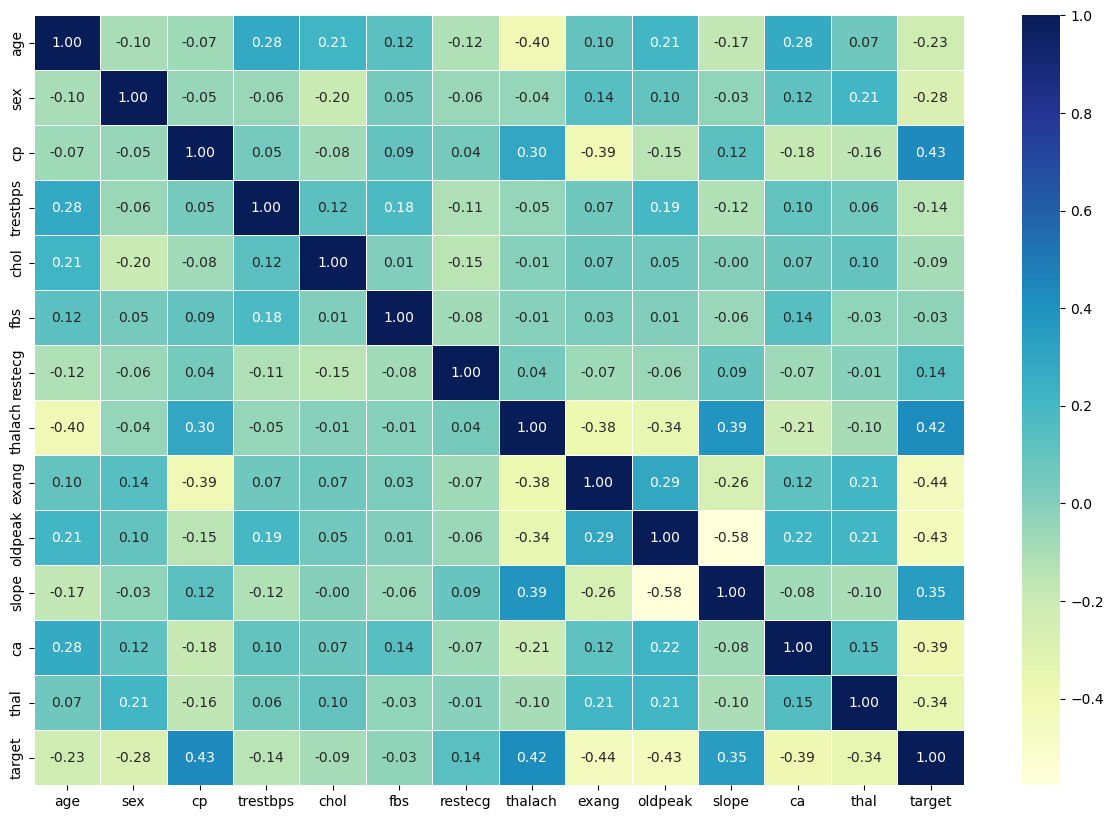

In [34]:
# let's make our correlation matrix a little prettier
corr_matrix = h_df.corr()
fig, ax = plt.subplots(figsize =(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths =0.5,
                 fmt =".2f",
                 cmap ="YlGnBu");
plt.show()

## 5. Modelling 

In [35]:
h_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
# split data into x and y 
x = h_df.drop("target", axis =1)
y = h_df["target"]

In [37]:
# split data into train and test setp
np.random.seed(42)
# split into train and test
x_train, x_test, y_train, y_test = train_test_split( x,
                                                    y,
                                                    test_size =0.2)
                                                    

In [38]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### we split the data now we are going to model it using threee different model
    1. RandomForestClassifier
    2.LogisticRegression
    3.K-Nearest Neighbours Classifier


In [52]:
## create a dictionannary for the models
models ={"logisticRegressor": LogisticRegression(max_iter =1000),
         "KNN":KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate given machine models
    """
    np.random.seed(42)
    model_scores ={}
    # loop trough modles
    for name, model in models.items():
        # fit the model
        model.fit(x_train, y_train)
        # Evaluate the model
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
        

In [53]:
model_scores = fit_and_score(models =models,
                             x_train =x_train,
                             x_test =x_test,
                             y_train= y_train,
                             y_test= y_test)
model_scores

C:\Users\rakab\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logisticRegressor': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

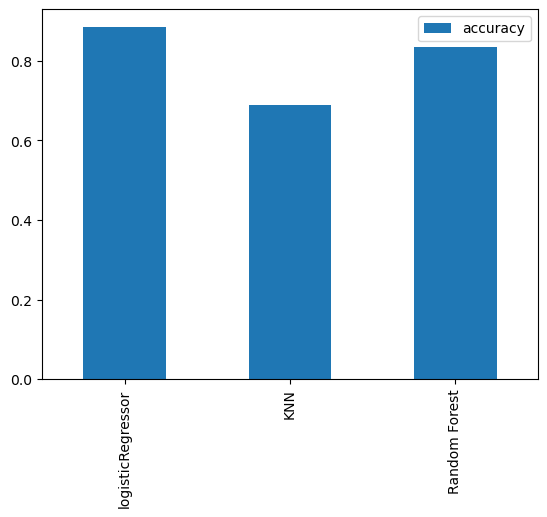

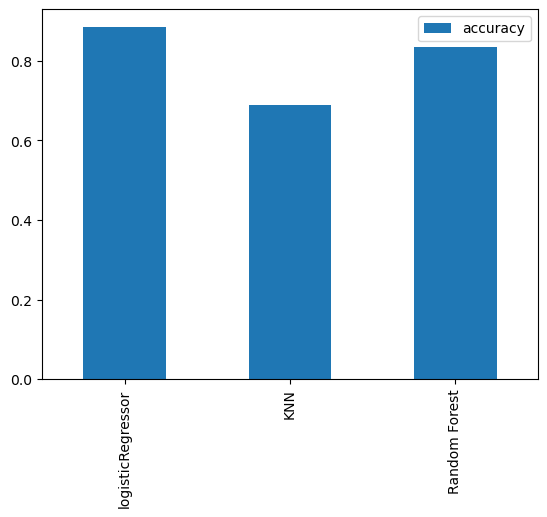

In [56]:
model_compare = pd.DataFrame(model_scores, index =["accuracy"])
model_compare.T.plot.bar();
plt.show()

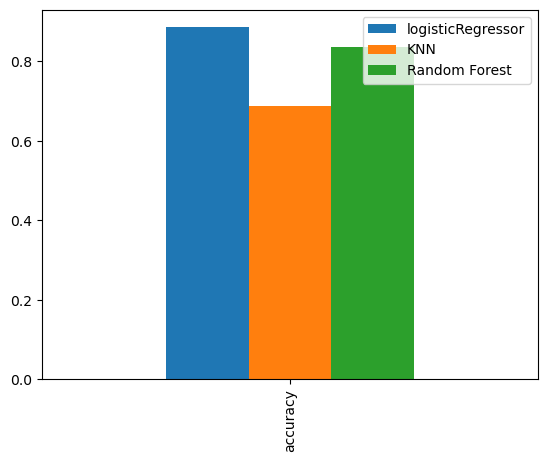

In [57]:
model_compare = pd.DataFrame(model_scores, index =["accuracy"])
model_compare.plot.bar();
plt.show()

### now we have our baseline model
### llet's look at the following
* Hypyterparameter
* Feature importance
* Confusion matrix
* Cross_validation
* Precision
* Recall
* F1
* Classification Report
* ROC Curve


In [59]:
train_scores =[]
test_scores =[]
# create a list of diferrrent value for n_neighbors
neighbors = range(1, 21)
# Set up KNN instance
knn = KNeighborsClassifier()
# setup KNN instance
for i in neighbors:
    knn.set_params(n_neighbors =i)
    # Fit thw algorithm
    knn.fit(x_train, y_train)
    # update the training score list
    train_scores.append(knn.score(x_train, y_train))
    # update the test scores
    test_scores.append(knn.score(x_test, y_test))
    


In [60]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [61]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

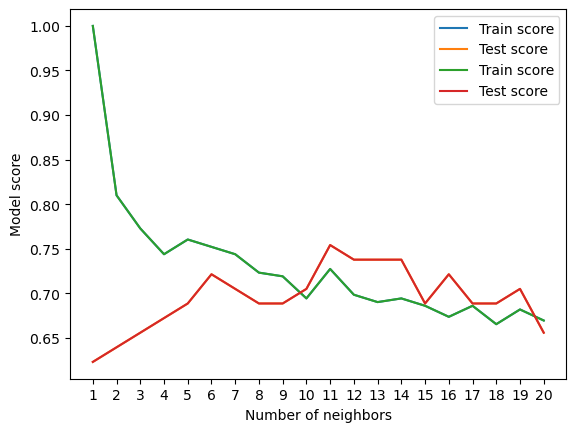

Maximum KNN score on the test data: 75.41 %


In [63]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label ="Test score")
plt.xticks(np.arange(1, 21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f} %")

## hyperparamter tuning with RandomizedSearch Cv
we are going to Tune 
* LogisticRegression
* RandomForestClassifier
......using RandomizedSearchCV

In [76]:
# Create a hyperparameter for  LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}
# Create a hyperparameter grid for RandomForestClasifier
rf_grid ={"n_estimators" : np.arange(10, 1000, 50),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split":np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

## now let tune using RandomizedSearCV

In [77]:
# Tune logistic Regression
np.random.seed(42)
# Setup random huyperparameter search for LogsticRegression
rs_log_reg = RandomizedSearchCV (LogisticRegression(),
                                 param_distributions = log_reg_grid,
                                 cv =5,
                                 n_iter =20,
                                 verbose = True)
# fit random for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [78]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [79]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

### noe let tune for RnadomForestClassifier

In [80]:
np.random.seed(42)
# set up random search for RnadomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions =rf_grid,
                           cv =5,
                           n_iter =20,
                           verbose =True)
# fit the randomized search
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [81]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [82]:
# check the scores
rs_rf.score(x_test, y_test)

0.8688524590163934

## hyperparametrs tuning using GridSearchCV
Since our Logistic regression is the best we we willl improve it using GridSearch

In [85]:
log_reg_grid ={"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}
# set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid =log_reg_grid,
                          cv =5,
                          verbose =True)
# fit the grid hyperparameter search 
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [86]:
# check the best hyperparameter
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [87]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

### Evaluate our tuned machine learning classifier,  beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification
* Precision
* Recall
* F1_score
... and it would grade if cross- validation was used where possible.
  make comparaison and evaluate our trained model, first we need to make prediction

In [88]:
# make prediction
y_preds= gs_log_reg.predict(x_test)

In [89]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

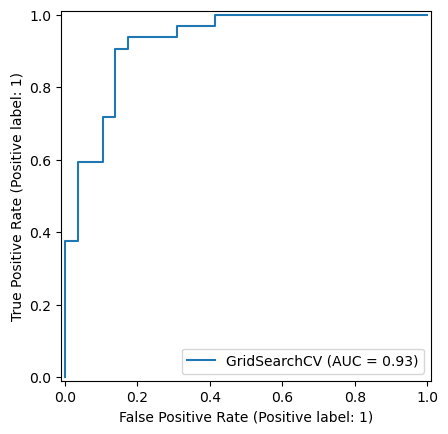

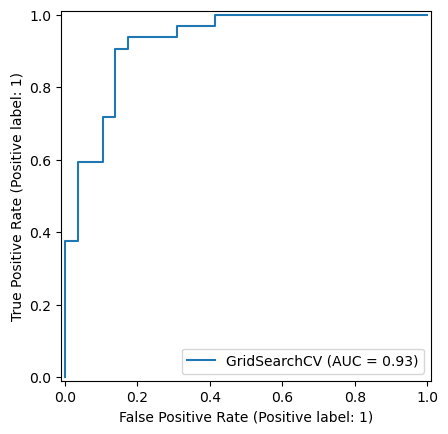

In [95]:
### plot Roc curveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.show()

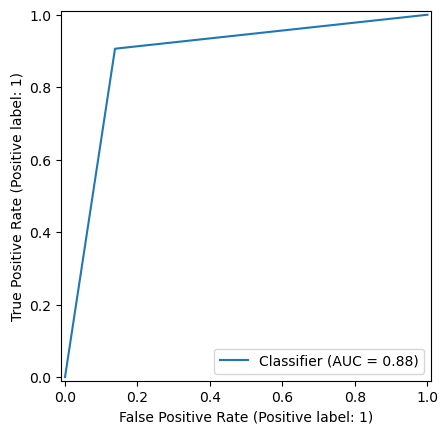

In [98]:
RocCurveDisplay.from_predictions( y_test, y_preds)
plt.show()

In [99]:
## confusion matrix
print(confusion_matrix(y_test, y_preds))
      

[[25  4]
 [ 3 29]]


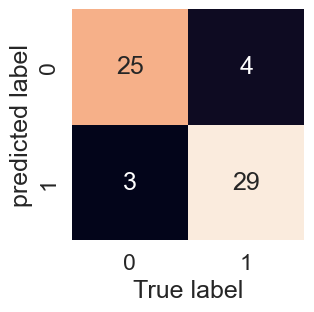

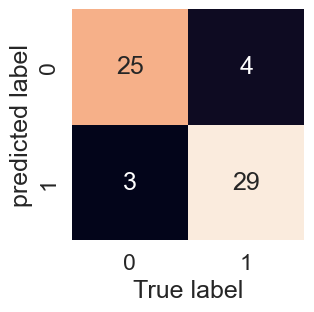

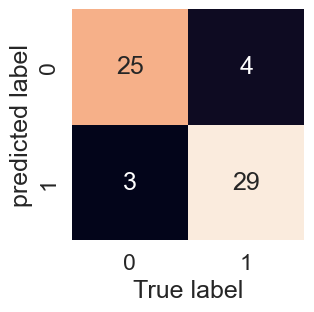

In [102]:
sns.set(font_scale =1.5)
def plot_conf_mat(y_test, y_preds):
    """
    plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot =True,
                     cbar= False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
plot_conf_mat(y_test, y_preds)
plt.show()

In [103]:
### now classification report and cross_validation precision,recall and f1
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## calcule evaluate metrics using cross_validation


In [104]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [106]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver ="liblinear")

In [108]:
## cross_validation for accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         scoring ="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [109]:
np.mean(cv_acc)

np.float64(0.8446994535519124)

### Feature Importance
Feature importance is another as asking, "which features contributed most ti the outcomes of the model and how did they contribute?"
Findin Feature importance is different for each model.
One way to find to find feature importance is to search for"(MODEL NAME)feature importance".

Now let's find the feature importance for our LogisticRegression model...

In [110]:
# fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver ="liblinear")
clf.fit(x_train, y_train);

In [112]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [114]:
# match coeaf's of feature to columns
feature_dict = dict(zip(h_df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

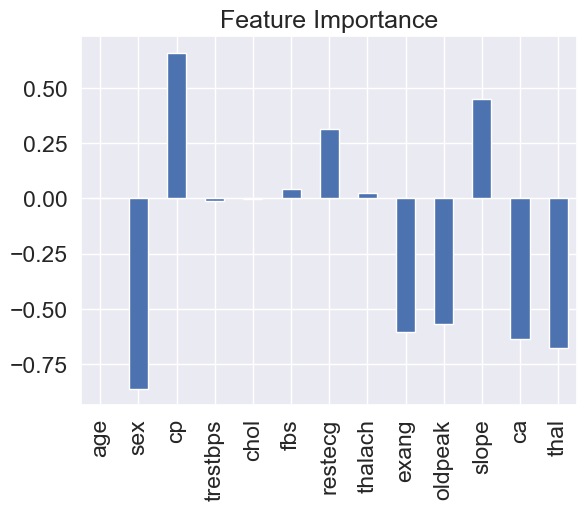

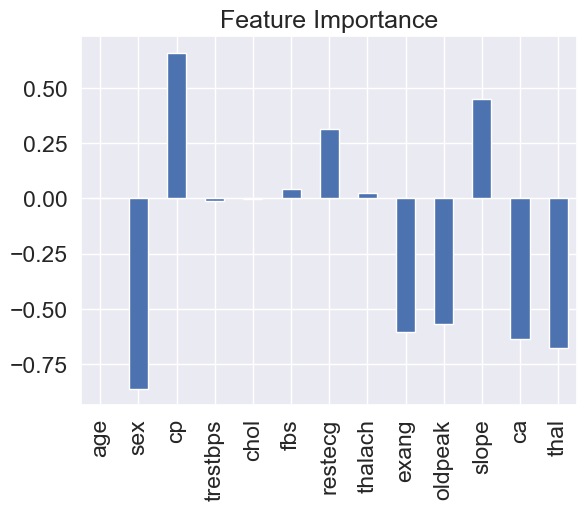

In [116]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False);
plt.show()

## 6. Experimentation
if you haven't hit your evaluation metric yet... ask yourself..
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve a current models? (beyond what we have done so far)
* if your model is goog enough( you have hit your evaluation metric) how would you export it and share it with others?
